C:\Users\Ermeson\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8260869565217391
Predito T   1  All
Real              
0           4    4
1          19   19
All        23   23
Sexo dos pacientes:


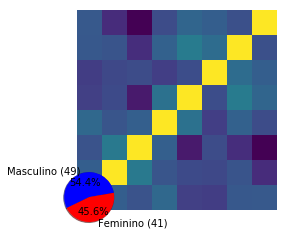

Idade:


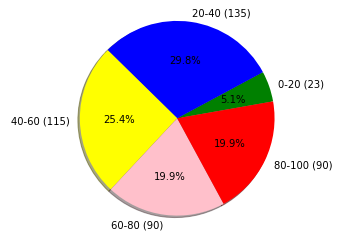

Tipos de verrugas:


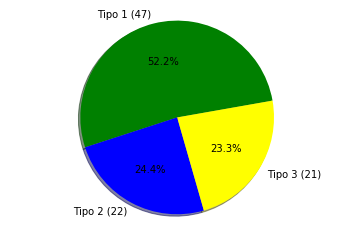

{'whiskers': [<matplotlib.lines.Line2D at 0x251ffc01f60>,
 'caps': [<matplotlib.lines.Line2D at 0x251ffc067f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x251ffc019e8>],
 'medians': [<matplotlib.lines.Line2D at 0x251ffc06d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x251fff514a8>],
 'means': []}

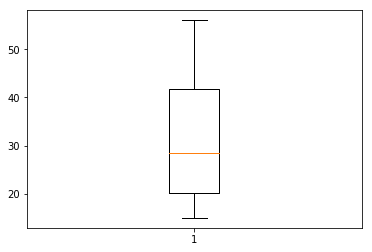

In [9]:
import pandas as pd
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix

#Nome: Imunoterapia
#Esse dataset fala sobre o resultado do tratamento de verrugas utilizando Imunoterapia
#Possui 8 atributos


df = pd.read_excel('Immunotherapy.xlsx')

x = df[['sex','age','Time','Number_of_Warts', 'Type','Area','induration_diameter']]
y = df[['Result_of_Treatment']]

plt.matshow(df.corr())

clf = LinearDiscriminantAnalysis()

'''scores = cross_val_score(clf, x, y, cv = 10)
print(scores)'''

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25, random_state=0)

#rskf = RepeatedStratifiedKFold(n_splits=2, n_repeats=2,random_state=36851234)
#x_treino, x_teste, y_treino, y_teste = rskf.split(x, y)

#Substituição dos valores das colunas:
df.loc[df['Result_of_Treatment'] == 1, 'Result_of_Treatment'] = "Sucesso"
df.loc[df['Result_of_Treatment'] == 0, 'Result_of_Treatment'] = "Fracasso"
df.loc[df['sex'] == 1, 'sex'] = "Feminino"
df.loc[df['sex'] == 2, 'sex'] = "Masculino"

#Teste Análise Discriminatória Linear (maior score)

clf.fit(x_treino, y_treino)

print(clf.score(x_teste, y_teste))

print(pd.crosstab(y_teste.values.ravel(), clf.predict(x_teste), rownames=['Real'], colnames=['Predito T'], margins=True))



#Teste Análise Discriminatória Quadrática
'''clf = QuadraticDiscriminantAnalysis()
clf.fit(x_treino, y_treino.values.ravel())

print(clf.score(x_teste, y_teste))

print(pd.crosstab(y_teste.values.ravel(), clf.predict(x_teste), rownames=['Real'], colnames=['Predito T'], margins=True))

#Teste Floresta Randômica
clf = RandomForestClassifier()
clf.fit(x_treino, y_treino.values.ravel())

print(clf.score(x_teste, y_teste))

print(pd.crosstab(y_teste.values.ravel(), clf.predict(x_teste), rownames=['Real'], colnames=['Predito T'], margins=True))

#Teste Bagging
clf = BaggingClassifier()
clf.fit(x_treino, y_treino.values.ravel())

print(clf.score(x_teste, y_teste))

print(pd.crosstab(y_teste.values.ravel(), clf.predict(x_teste), rownames=['Real'], colnames=['Predito T'], margins=True))'''

#Gráfico de sexo dos pacientes
masc = df[df['sex'] == 'Masculino']['sex'].count()
fem = df[df['sex'] == 'Feminino']['sex'].count()

labels = ('Masculino (%s)'%masc, 'Feminino (%s)'%fem)
sizes = [masc, fem]
colors = ['blue', 'red']

# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=10)
print("Sexo dos pacientes:")
plt.axis('equal')
plt.show()

#Gráfico de idade dos pacientes
zeroto20 = df[df['age'] <= 20]['age'].count()
twentyto40 = df[df['age'] >= 20]['age'].count()
twentyto40 += df[df['age'] <= 40]['age'].count()
fortyto60 = df[df['age'] >= 40]['age'].count()
fortyto60 += df[df['age'] <= 60]['age'].count()
sixtyto80 = df[df['age'] >= 60]['age'].count()
sixtyto80 += df[df['age'] <= 80]['age'].count()
eightyto100 = df[df['age'] >= 80]['age'].count()
eightyto100 += df[df['age'] <= 100]['age'].count()

labels = ('0-20 (%s)'%zeroto20, '20-40 (%s)'%twentyto40, '40-60 (%s)'%fortyto60, '60-80 (%s)'%sixtyto80, '80-100 (%s)'%eightyto100)
sizes = [zeroto20, twentyto40, fortyto60, sixtyto80, eightyto100]
colors = ['green', 'blue', 'yellow','pink','red']

plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=10)
print("Idade:")
plt.axis('equal')
plt.show()

#Gráfico de tipos de verrugas
t1 = df[df['Type'] == 1]['Type'].count()
t2 = df[df['Type'] == 2]['Type'].count()
t3 = df[df['Type'] == 3]['Type'].count()

labels = ('Tipo 1 (%s)'%t1, 'Tipo 2 (%s)'%t2, 'Tipo 3 (%s)'%t3)
sizes = [t1, t2, t3]
colors = ['green', 'blue', 'yellow']

# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=10)
print("Tipos de verrugas:")
plt.axis('equal')
plt.show()

#diagrama de caixa
age = df['age']
plt.boxplot(age, showfliers=True)


SyntaxError: invalid syntax (<ipython-input-14-9f979462966f>, line 1)